**Cargando Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_dm = pd.read_json('/content/drive/MyDrive/NLP/Digital_Music.json.gz',lines=True, compression='gzip')

In [4]:
df_dm.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"12 22, 2013",A1ZCPG3D3HGRSS,0001388703,{'Format:': ' Audio CD'},mark l. massey,This is a great cd full of worship favorites!!...,Great worship cd,1387670400,NaN,NaN
1,5,True,"09 11, 2013",AC2PL52NKPL29,0001388703,{'Format:': ' Audio CD'},Norma Mushen,"So creative! Love his music - the words, the ...",Gotta listen to this!,1378857600,NaN,NaN
2,5,True,"03 2, 2013",A1SUZXBDZSDQ3A,0001388703,{'Format:': ' Audio CD'},Herbert W. Shurley,"Keith Green, gone far to early in his carreer,...",Great approach still gets the message out,1362182400,NaN,NaN
3,5,True,"12 2, 2012",A3A0W7FZXM0IZW,0001388703,{'Format:': ' Audio CD'},Mary M Raybell,Keith Green had his special comedy style of Ch...,Great A must have,1354406400,NaN,NaN
4,5,False,"01 7, 2012",A12R54MKO17TW0,0001388703,{'Format:': ' Audio CD'},J. Bynum,Keith Green / So you wanna go back to Egypt......,A great one from Keith with a guest appearance...,1325894400,6,NaN


In [5]:
df_dm.head().T #de esta forma podemos ver con mas detalle de que trata cada columna

,0,1,2,3,4
overall,5,5,5,5,5
verified,True,True,True,True,False
reviewTime,"12 22, 2013","09 11, 2013","03 2, 2013","12 2, 2012","01 7, 2012"
reviewerID,A1ZCPG3D3HGRSS,AC2PL52NKPL29,A1SUZXBDZSDQ3A,A3A0W7FZXM0IZW,A12R54MKO17TW0
asin,0001388703,0001388703,0001388703,0001388703,0001388703
style,{'Format:': ' Audio CD'},{'Format:': ' Audio CD'},{'Format:': ' Audio CD'},{'Format:': ' Audio CD'},{'Format:': ' Audio CD'}
reviewerName,mark l. massey,Norma Mushen,Herbert W. Shurley,Mary M Raybell,J. Bynum
reviewText,This is a great cd full of worship favorites!!...,"So creative! Love his music - the words, the ...","Keith Green, gone far to early in his carreer,...",Keith Green had his special comedy style of Ch...,Keith Green / So you wanna go back to Egypt......
summary,Great worship cd,Gotta listen to this!,Great approach still gets the message out,Great A must have,A great one from Keith with a guest appearance...
unixReviewTime,1387670400,1378857600,1362182400,1354406400,1325894400


In [6]:
#drop de las columnas que no aportan nada al texto y no son el target que buscamos en este ejercicio

df_dm.drop(['verified','reviewTime','reviewerID','style','reviewerName','vote','image','unixReviewTime'], axis=1, inplace=True)

In [7]:
df_dm.head()

,overall,asin,reviewText,summary
0,5,0001388703,This is a great cd full of worship favorites!!...,Great worship cd
1,5,0001388703,"So creative! Love his music - the words, the ...",Gotta listen to this!
2,5,0001388703,"Keith Green, gone far to early in his carreer,...",Great approach still gets the message out
3,5,0001388703,Keith Green had his special comedy style of Ch...,Great A must have
4,5,0001388703,Keith Green / So you wanna go back to Egypt......,A great one from Keith with a guest appearance...


In [8]:
df_dm.shape

(1584082, 4)

In [9]:
#realice este shuffle ya que en el head del data set casi siempre se ven solos solo valores con 5 estrellas
#asi nos aseguramos un poco mas de que cuando tomemos solo un fragmento no sean solos de una sola calificacion
from sklearn.utils import shuffle
df = shuffle(df_dm)

In [10]:
df.head()

,overall,asin,reviewText,summary
131682,5,B00136NUG6,"I had this as an album years ago, but my turnt...",Great CD
1474200,5,B00XO3BUB8,I ordered the original version of this DVD and...,The Show is excellent!
1456915,5,B00UP0PETC,Keep making the music Brandon - you're the best.,Love Flowers.
296840,5,B0092MKUNY,Loved,I love it
567948,5,B01A9DL7MM,"I picked up the double disc at their show, whi...","Excellent, excellent album"


In [11]:
df['overall'].value_counts() #contando los valores de cada calificación en el dataset podemos ver que la mayoria son positivos

5    1280147
4     179929
3      57347
1      43108
2      23551
Name: overall, dtype: int64

In [12]:
df = df[:10000]

In [13]:
df.shape

(10000, 4)

In [14]:
df = df.sample(frac = 1)

In [15]:
df.head()

,overall,asin,reviewText,summary
1514259,5,B015TRTIOC,"Martha's presence, voice and story create such...",Best Way To Renew and Refresh!
831578,5,B001A3A4HK,"A very large album, but displays their talents...",they would have blown away a lot of the bands ...
243003,5,B004X0Y9N2,I love Shinedown. This CD is fantastic. If y...,Fabulous
1406096,5,B00BIXG1MY,5 star review from YAHOO music critic: Jonatha...,5 Stars from Yahoo music !
1427352,5,B00QLY8DPI,"Very mature lyrics, nice beats.",Sexy


In [16]:
df.describe() 
#seguimos viendo que la mayoria son positivos, y la media del rating es 4.6 , que como indican los porcentajes 
# es debido a que la mayoria son 5.

,overall
count,10000.000000
mean,4.659900
std,0.844218
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [17]:
df['overall'].value_counts() 

5    8067
4    1163
3     347
1     275
2     148
Name: overall, dtype: int64

In [18]:
print(df.isna().sum()) #revisando cuantos na hay en el data set

overall       0
asin          0
reviewText    5
summary       2
dtype: int64


In [19]:
# Creando una columna que diga si la calificación es positiva, negativa o neutral basado en el rating 



#df['sentiment'] = np.where((df['overall'] < 3), -1, df.overall)
#df['sentiment'] = np.where((df['overall'] == 3), 0, df.overall)
#df['sentiment'] = np.where((df['overall'] > 3), 1, df.overall)

def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
# Add sentiments to the data
df["sentiment"] = df["overall"].apply(sentiments)
df["sentiment"] = df["overall"].apply(sentiments)
df["sentiment"][:20]

1514259    Positive
831578     Positive
243003     Positive
1406096    Positive
1427352    Positive
320168     Positive
728451     Positive
668351     Positive
1376016    Positive
343860      Neutral
1463856    Positive
379141     Positive
441898     Positive
410487     Positive
143140     Positive
1450621    Positive
814574     Positive
570594     Positive
1534735    Positive
1327640    Negative
Name: sentiment, dtype: object

Procesando el dataset a través de lemmatize, quitando stopwords, y rellenando los NAs

In [20]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import nltk

def lemmatize(text):
  return WordNetLemmatizer().lemmatize(text, pos='v')
def preprocess(text):
  result = []
  for token in gensim.utils.simple_preprocess(text):
    if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
      result.append(lemmatize(token))
  return " ".join(result)

In [21]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [22]:
processed_text = df['reviewText'].fillna('').astype(str).map(preprocess)

In [23]:
processed_text.head()

1514259    martha presence voice story create deep invita...
831578     large album display talents artistic vision so...
243003     love shinedown fantastic hear concert right en...
1406096    star review yahoo music critic jonathan frahm ...
1427352                               mature lyric nice beat
Name: reviewText, dtype: object

In [24]:
df['reviewText'] = df['reviewText'].fillna('').astype(str).map(preprocess)

In [25]:
df['summary'] = df['summary'].fillna('').astype(str).map(preprocess)

In [26]:
df['wordCounts'] = df['reviewText'].apply(lambda x: len(str(x.split()))) 

In [27]:
df.head()

,overall,asin,reviewText,summary,sentiment,wordCounts
1514259,5,B015TRTIOC,martha presence voice story create deep invita...,best renew refresh,Positive,148
831578,5,B001A3A4HK,large album display talents artistic vision so...,blow away band like enjoyable,Positive,197
243003,5,B004X0Y9N2,love shinedown fantastic hear concert right en...,fabulous,Positive,108
1406096,5,B00BIXG1MY,star review yahoo music critic jonathan frahm ...,star yahoo music,Positive,518
1427352,5,B00QLY8DPI,mature lyric nice beat,sexy,Positive,35


Text(0.5, 1.0, 'Avg. no. of words in reviews vs. Rating')

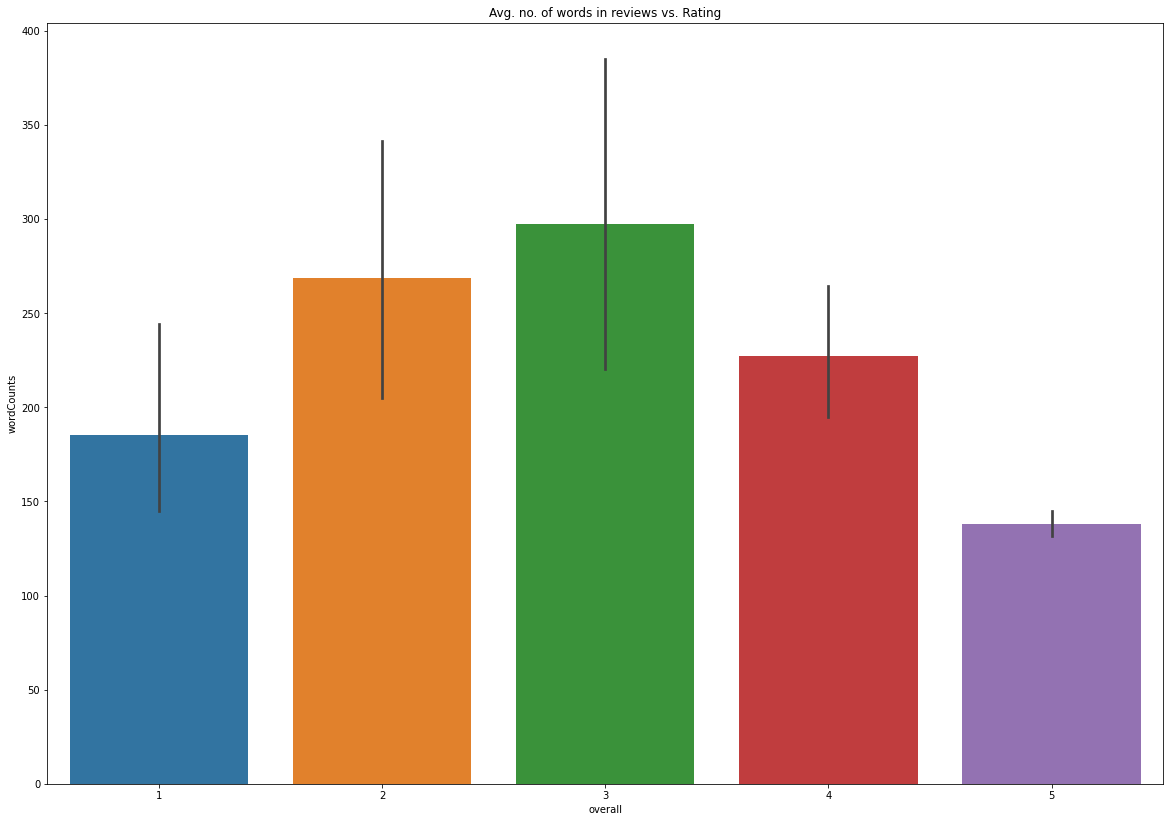

In [28]:
plt.figure(figsize=(20,14))
sns.barplot(x='overall', y='wordCounts', data=df)
plt.title('Avg. no. of words in reviews vs. Rating')

In [29]:
print(df.isna().sum())

overall       0
asin          0
reviewText    0
summary       0
sentiment     0
wordCounts    0
dtype: int64


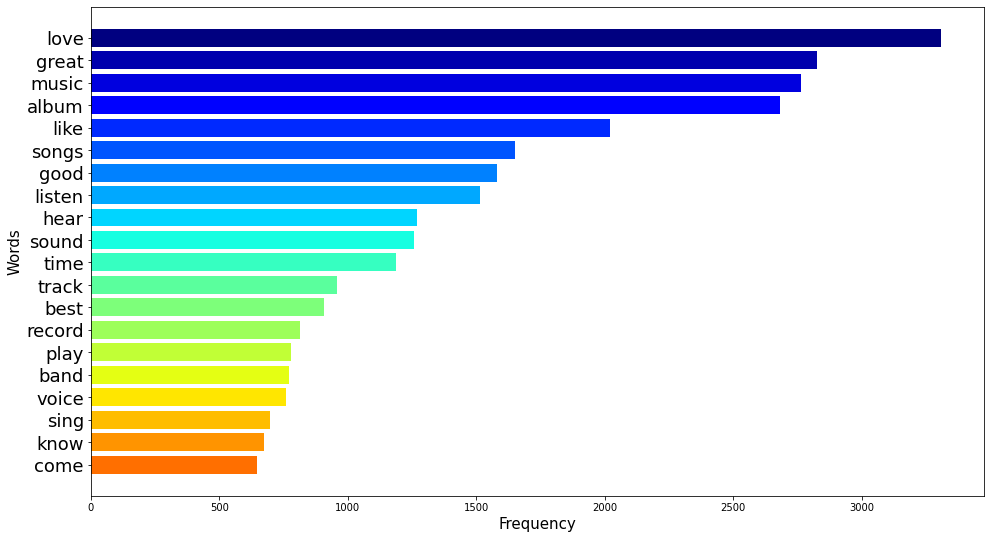

In [30]:
#Frecuencia de palabras encontradas en los reviews

from collections import Counter
words = [x.split() for x in df.reviewText.values]
from itertools import chain
cx = Counter(list(chain(*words)))
top = 20
most_common = cx.most_common()[1:]
x,y = zip(*most_common[:top])
fig, ax = plt.subplots(1, figsize=(16,9))
ax.barh(range(len(x)), y, color = plt.cm.jet(np.linspace(0, 1, 25)))
ax.invert_yaxis()
ax.set_xlabel('Frequency', fontsize=15)
ax.set_ylabel('Words', fontsize=15)
ax.set_yticks(np.arange(len(x)))
ax.set_yticklabels(x, fontsize=18)
plt.show()


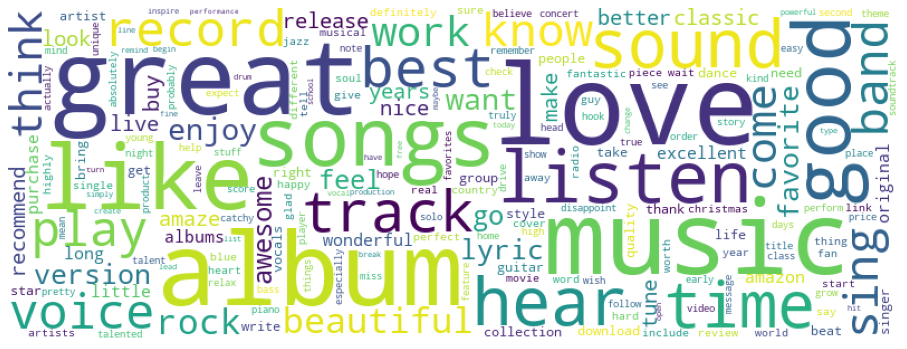

In [31]:
from wordcloud import WordCloud

d = {}
for k,v in most_common[:]:
  d[k] = int(v)

wc = WordCloud(relative_scaling=.5, width=800, height=300, background_color='white', stopwords=gensim.parsing.preprocessing.STOPWORDS).generate_from_frequencies(d)
fig = plt.figure(1, figsize=(16,8))
plt.imshow(wc)
plt.axis('off')
plt.show()



**Analisis de la polaridad de los Reviews mediante el uso de TEXTBLOB**

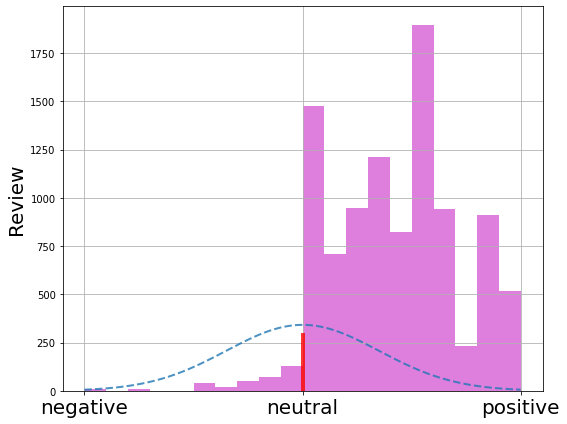

In [32]:


import matplotlib.pyplot as plt
from textblob import TextBlob

def TextBlob_sentimental(df):
  return TextBlob(df).sentiment.polarity

df['polarity'] = df.reviewText.apply(lambda x: TextBlob_sentimental(''.join(x)))
hist, edges = np.histogram(df.polarity.values, bins=np.arange(-2, 2, 0.1))

from scipy.stats import norm
fig, ax = plt.subplots(figsize=(8, 6))
df.polarity.hist(ax=ax, bins=20, color='m', alpha=.5)
ax.set_xticks(range(-1, 2))
ax.set_xticklabels(['negative', 'neutral', 'positive'], fontsize=20)
ax.set_ylabel('Review', fontsize=20)
x = np.arange(-1, 1, 0.001)
ax.plot(x, norm.pdf(x, 0, 0.35) * 300, '--', linewidth=2, alpha=0.8)
ax.vlines(0,0,300, color='r', linewidth=4, linestyles='-', alpha=0.8)
plt.tight_layout()
plt.show()

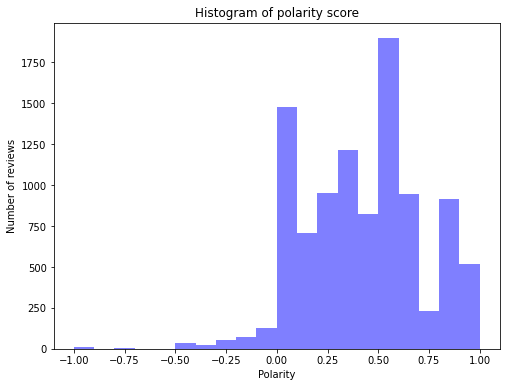

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
num_bins = 20
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(df.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of reviews')
plt.title('Histogram of polarity score')
plt.show()

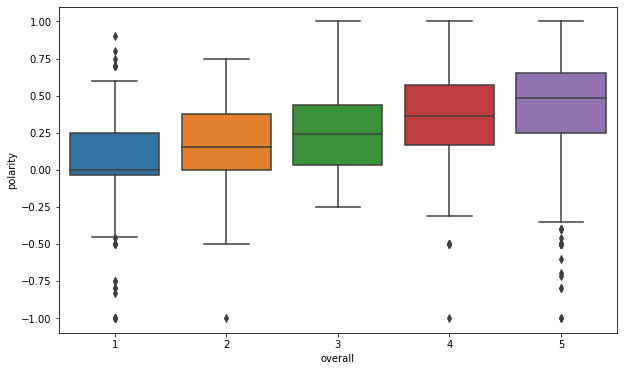

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(x='overall', y='polarity', data=df)
plt.show()

**Empezamos la creación de nuestro modelo**

In [35]:
#Dividimos el dataset
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3)

In [36]:
print(train.shape)
print(test.shape)

(7000, 7)
(3000, 7)


In [37]:
#fijamos las variables que queremos usar y nuestro objetivo

X_train = train["reviewText"]
Y_train = train["sentiment"]
X_test = test["reviewText"]
Y_test = test["sentiment"]
print(len(X_train), len(X_test))

7000 3000


In [38]:
#Vectorizamos los reviews

from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train) 
X_train_counts.shape

(7000, 13493)

In [39]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(7000, 13493)

In [40]:
#Creamos el pipeline usando Multinominal Naive Bayes como nuestro clasificador, ya que segun entiendo que es la
#usada para clasificacion de textos debido a que compara los features de cada vector e ignora cuando el feature no se
#repite en el mismo contexto.


from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()), 
                             ("tfidf", TfidfTransformer()),
                             ("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(X_train, Y_train) 

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_nominalNB', MultinomialNB())])

In [41]:
#probamos el modelo
import numpy as np
predictedMultiNB = clf_multiNB_pipe.predict(X_test)
predictedMultiNB
np.mean(predictedMultiNB == Y_test)

0.925

In [42]:
predictedMultiNB

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [43]:
from sklearn.metrics import classification_report
print(classification_report(predictedMultiNB,Y_test))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         0
     Neutral       0.00      0.00      0.00         0
    Positive       1.00      0.93      0.96      3000

    accuracy                           0.93      3000
   macro avg       0.33      0.31      0.32      3000
weighted avg       1.00      0.93      0.96      3000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
#probando con una regresion logistica

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf_logReg_pipe = Pipeline([("vect", CountVectorizer()), 
                            ("tfidf", TfidfTransformer()), 
                            ("clf_logReg", LogisticRegression())])
clf_logReg_pipe.fit(X_train, Y_train)
import numpy as np
predictedLogReg = clf_logReg_pipe.predict(X_test)
np.mean(predictedLogReg == Y_test)

0.9266666666666666

In [46]:
print(classification_report(predictedLogReg,Y_test))

              precision    recall  f1-score   support

    Negative       0.07      0.67      0.12        12
     Neutral       0.00      0.00      0.00         0
    Positive       1.00      0.93      0.96      2988

    accuracy                           0.93      3000
   macro avg       0.36      0.53      0.36      3000
weighted avg       1.00      0.93      0.96      3000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
